## Using Quantum devices and Simulators

In addition to the idealised noiseless simulators we used previously we can also target emulators which try to replicate the constraints and noise of a real quantum computer

In order to give some ideas of quantum compilation we can use a larger Quantum Phase estimation circuit and run it on an IBM Simulator.

**Disclaimer:** Not the most realistic experiment 

Visit https://quantum-computing.ibm.com/ to get an API token. Also see 

To see how to save IBM credentials in pytket-qiskit see this page
https://cqcl.github.io/pytket-qiskit/api/index.html#access-and-credentials

In [1]:
from pytket.extensions.qiskit import IBMQEmulatorBackend
from pytket.qasm import circuit_from_qasm

qpe5_circ = circuit_from_qasm("qpe5.qasm")
noisy_backend = IBMQEmulatorBackend('ibmq_jakarta')

In [2]:
from pytket.circuit.display import render_circuit_jupyter

render_circuit_jupyter(qpe5_circ)

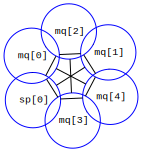

In [3]:
from pytket.utils import Graph

Graph(qpe5_circ).get_qubit_graph()

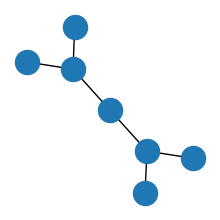

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

coupling_graph = noisy_backend.backend_info.architecture.coupling
G = nx.Graph(coupling_graph)
plt.figure(figsize=(2, 2))
nx.draw(G)
plt.show()

In [5]:
compiled_circuit_l0 = noisy_backend.get_compiled_circuit(qpe5_circ, optimisation_level=0)

cx_count = compiled_circuit_l0.n_2qb_gates()
print(f"How many CX gates do we have? (Level 0) {cx_count}")
print(f"How deep? (Level 0) {compiled_circuit_l0.depth()}")

How many CX gates do we have? (Level 0) 136
How deep? (Level 0) 202


In [6]:
render_circuit_jupyter(compiled_circuit_l0)

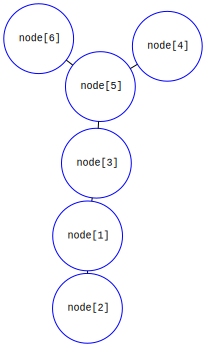

In [7]:
Graph(compiled_circuit_l0).get_qubit_graph()

In [8]:
handlel0 = noisy_backend.process_circuit(compiled_circuit_l0, n_shots=1000)
resultl0 = noisy_backend.get_result(handlel0)

((0, 1, 1, 0, 1), 399)


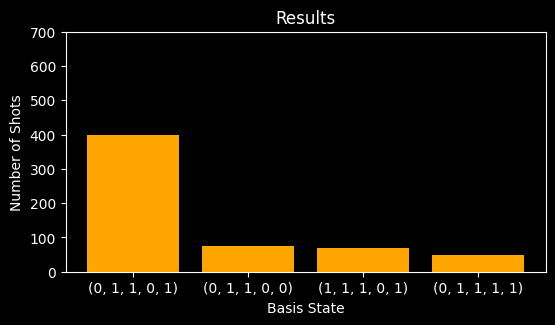

In [9]:
from plotting import plot_results
print(resultl0.get_counts().most_common()[0])

plot_results(resultl0, n_strings=4 , dark_mode=True)

In [10]:
from pytket import OpType

compiled_circuit_l2 = noisy_backend.get_compiled_circuit(qpe5_circ, optimisation_level=2)
cx_count = compiled_circuit_l2.n_gates_of_type(OpType.CX)
print(f"How many CX gates do we have? (Level 2) {cx_count}")
print(f"How deep? (Level 2) {compiled_circuit_l2.depth()}")

How many CX gates do we have? (Level 2) 52
How deep? (Level 2) 94


In [11]:
handlel2 = noisy_backend.process_circuit(compiled_circuit_l2, n_shots=1000)
resultl2 = noisy_backend.get_result(handlel2)

In [12]:
print(resultl2.get_counts().most_common()[0])

((0, 1, 1, 0, 1), 517)


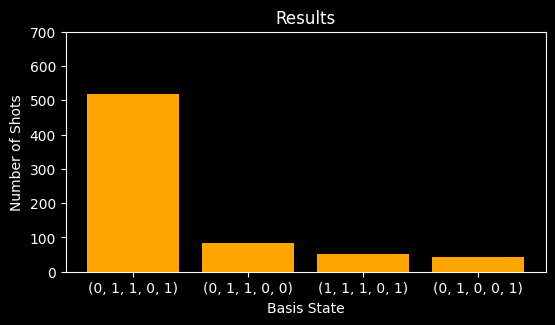

In [13]:
plot_results(resultl2, n_strings=4, dark_mode=True)

### Switching Backends in pytket

* Researchers may want to explore running their quantum algorithms on different devices
* Uniform `Backend` interface for targeting different devices/simulators
* lets switch to using the Quantinuum emulator.

In [15]:
from pytket.extensions.quantinuum import QuantinuumBackend

H1E_backend = QuantinuumBackend("H1-2E")
compiled_circuit = H1E_backend.get_compiled_circuit(qpe5_circ)

render_circuit_jupyter(compiled_circuit)
print(f"How many 2 qubit gates? {compiled_circuit.n_2qb_gates()}")
print(f"Circuit depth? {compiled_circuit.depth()}")

How many 2 qubit gates? 15
Circuit depth? 23


In [16]:
H1E_result = H1E_backend.run_circuit(compiled_circuit, n_shots=1000)

((0, 1, 1, 0, 1), 843)


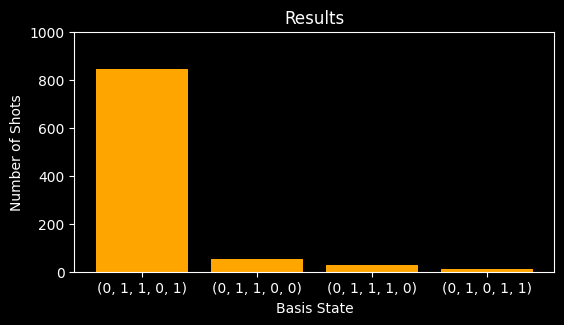

In [18]:
print(H1E_result.get_counts().most_common()[0])
plot_results(H1E_result, n_strings=4, dark_mode=True, y_limit=1000)